In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from adjustText import adjust_text

In [2]:
df = pd.read_csv('../data/All_combined.csv', parse_dates=['Date'], dtype={'Currency_Name': pd.StringDtype()})

In [3]:
plot_title_fontdict = {'fontweight': 'bold', 'fontsize': '18'}

# Análise inicial

Não existem valores nulos entre os dados

In [4]:
df.isnull().values.any()

False

O período de amostragem vai de 18 de julho de 2010 a 24 de agosto de 2021

In [5]:
df['Date'].min()

Timestamp('2010-07-18 00:00:00')

In [6]:
df['Date'].max()

Timestamp('2021-08-24 00:00:00')

Lista das criptomoedas analisadas

In [7]:
df['Currency_Name'].unique()

<StringArray>
[            'Aave',         'Algorand',        'Avalanche',
    'Axie_Infinity',     'Binance_Coin',      'Binance_USD',
          'Bitcoin',     'Bitcoin_BEP2',     'Bitcoin_Cash',
       'Bitcoin_SV',       'BitTorrent',          'Cardano',
        'Chainlink',           'Cosmos',  'Crypto.com_Coin',
              'Dai',             'Dash',         'Dogecoin',
           'Elrond',              'EOS',         'Ethereum',
 'Ethereum_Classic',         'Filecoin',        'FTX_Token',
              'GRT',              'ICP',             'IOTA',
           'Klaytn',           'Kusama',              'LEO',
         'Litecoin',            'Maker',           'Monero',
              'Neo',      'PancakeSwap',         'Polkadot',
          'Polygon',        'SHIBA_INU',           'Solana',
          'Stellar',           'Tether',            'Tezos',
            'THETA',             'Tron',          'Uniswap',
         'USD_Coin',          'VeChain',            'Waves',
          

# Tarefas

## Em qual dia houve maior alta e maior baixa?

In [8]:
change_by_currency = df.groupby('Currency_Name')['Change %']

### Em qual período as máximas valorizações se concentram?

<AxesSubplot:title={'center':'Histograma 1 - valorizações máximas de todo período'}>

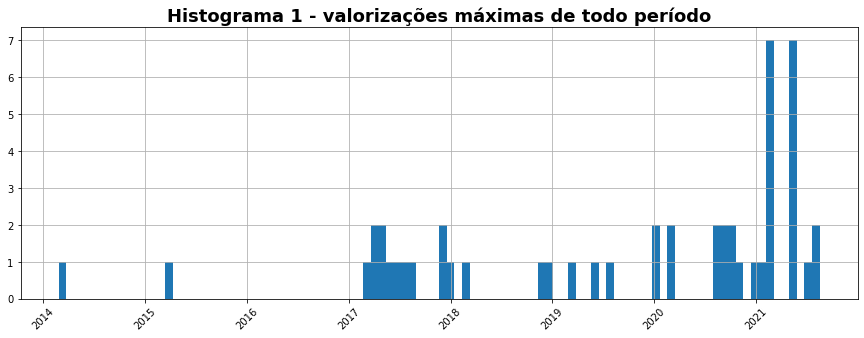

In [9]:
plt.title("Histograma 1 - valorizações máximas de todo período", fontdict=plot_title_fontdict)
df.loc[change_by_currency.idxmax(), 'Date'].hist(xrot=45, bins=100, figsize=(15, 5))

De acordo com o Histograma 1, existe uma concentração das máximas no ano de 2021. Vamos analisar com mais detalhes esse período.

In [10]:
date_filter = df['Date'].dt.year == 2021
grouped_change_2021 = df[date_filter].groupby('Currency_Name')['Change %']

<AxesSubplot:title={'center':'Histograma 2 - valorizações máximas de 2021'}>

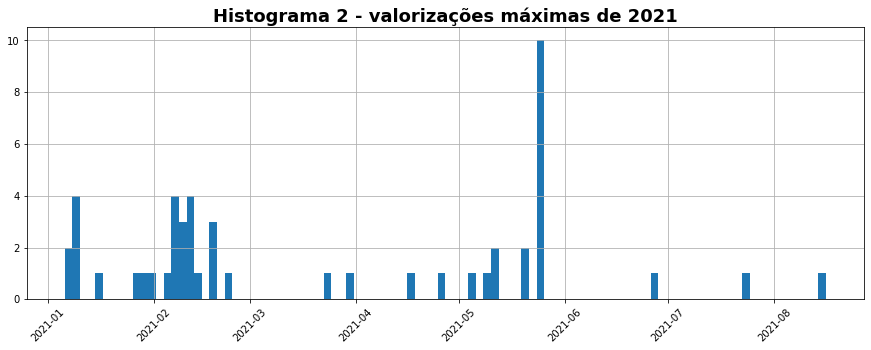

In [11]:
plt.title('Histograma 2 - valorizações máximas de 2021', fontdict=plot_title_fontdict)
df.loc[grouped_change_2021.idxmax(), 'Date'].hist(xrot=45, bins=100, figsize=(15, 5))

É possível identificar uma concentração das máximas no mês de maio. No Histograma 1 as máximas do inicio de 2021 se somam e aparecem como outra concentração, mas que o Histograma 2 revela se tratar de máximas mais dispersas.

Por ser uma concentração expressiva das máximas, vamos analisar as máximas que ocorreram no mês de maio de 2021.

In [12]:
maximas = df.loc[grouped_change_2021.idxmax(), ['Date', 'Currency_Name', 'Change %']]
date_filter = ('2021-05' <= maximas['Date']) & (maximas['Date'] <= '2021-06')
maximas = maximas[date_filter]

In [13]:
maximas.sort_values('Change %', ascending=False).rename(columns={'Date': 'Data', 'Currency_Name': 'Nome da criptomoeda', 'Change %': 'Variação %'})

,Data,Nome da criptomoeda,Variação %
39136,2021-05-24,Polygon,59.83
21978,2021-05-11,EOS,56.18
9366,2021-05-05,Bitcoin_Cash,52.83
47191,2021-05-24,Uniswap,47.46
25839,2021-05-24,Ethereum_Classic,42.64
36368,2021-05-20,Monero,40.80
30048,2021-05-24,Kusama,33.30
13818,2021-05-24,Chainlink,32.68
39241,2021-05-24,SHIBA_INU,31.56
1182,2021-05-24,Aave,31.19


In [14]:
date_filter = maximas['Date'] == '2021-05-24'
maximas[date_filter]['Currency_Name'].count()

10

93

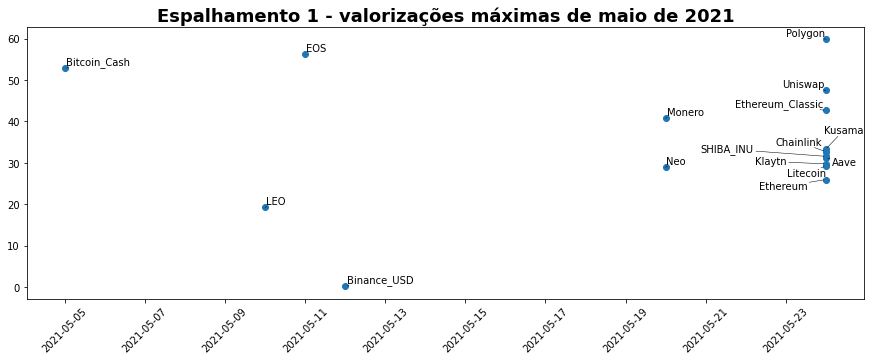

In [15]:
X = maximas['Date'].to_list()
Y = maximas['Change %'].to_list()
annotations = maximas['Currency_Name'].to_list()

plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.scatter(X, Y)
plt.title("Espalhamento 1 - valorizações máximas de maio de 2021", fontdict=plot_title_fontdict)
texts = [plt.text(X[i], Y[i], annotations[i]) for i in range(len(X))]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

Podemos observar pelo gráfico de espalhamento e pelos dados que
 * a Polygon teve a maior máxima (59,83 %), seguida pela EOS (56,18 %) e Bitcoin_Cash (52,83 %)
 * a valorização da Polygon está fortemente relacionada com um fenômeno de alta geral das criptomoedas já que a máxima dela está acompanhada pelas máximas de outras dez criptomoedas que ocorreram no mesmo dia (24 de maio)
 * as máximas da Bitcoin_Cash e da EOS são indícios de grande valorização, nesse período, das criptomoedas em geral, apesar de não fazerem diretamente parte do fenômeno de valorização ocorrido no dia 24
 * Binance_USD teve a menor máxima valorização, com 0,16 %

### Em qual período as máximas desvalorizações se concentram?

<AxesSubplot:title={'center':'Histograma 3 - desvalorizações máximas de todo período'}>

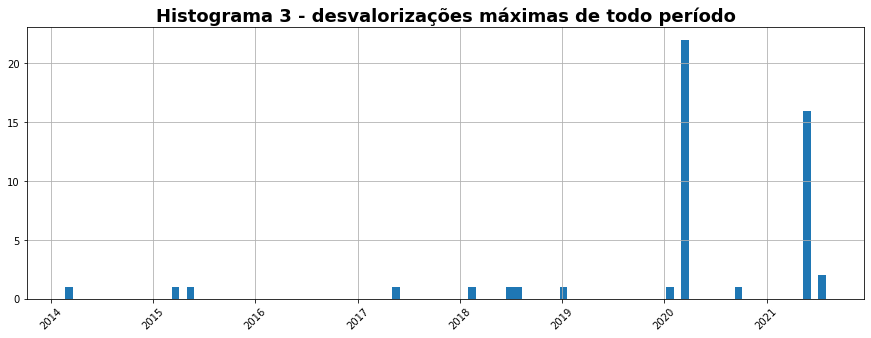

In [16]:
plt.title("Histograma 3 - desvalorizações máximas de todo período", fontdict=plot_title_fontdict)
df.loc[change_by_currency.idxmin(), 'Date'].hist(xrot=45, bins=100, figsize=(15, 5))

Podemos perceber que houve concentrações de máximas desvalorizações no primeiro semestre de 2020 e no ano de 2021. Primeiro vamos investigar com mais detalhes o primeiro semestre de 2020.

#### Máximas desvalorizações de 2020

In [17]:
date_filter = (df['Date'] >= '2020-01') & (df['Date'] <= '2020-07')
grouped_change_2020 = df[date_filter].groupby('Currency_Name')['Change %']

<AxesSubplot:title={'center':'Histrograma 4 - desvalorizações máximas no primeiro semestre de 2020'}>

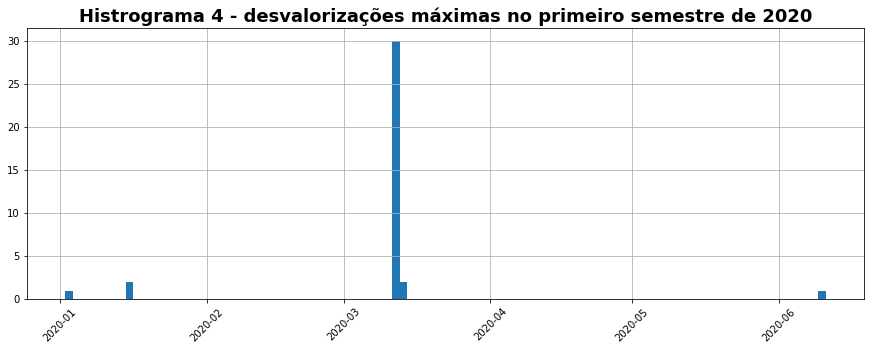

In [18]:
plt.title("Histrograma 4 - desvalorizações máximas no primeiro semestre de 2020", fontdict=plot_title_fontdict)
df.loc[grouped_change_2020.idxmin(), 'Date'].hist(xrot=45, bins=100, figsize=(15, 5))

In [19]:
minimas_2020 = df.loc[grouped_change_2020.idxmin(), ['Date', 'Currency_Name', 'Change %']]
date_filter = ('2020-03' <= minimas_2020['Date']) & (minimas_2020['Date'] <= '2020-04')
minimas_2020 = minimas_2020[date_filter]

In [20]:
minimas_2020['Date'].unique()

array(['2020-03-12T00:00:00.000000000', '2020-03-13T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [21]:
date_filter = minimas_2020['Date'] == '2020-03-12'
minimas_2020[date_filter]['Currency_Name'].count()

30

In [22]:
minimas_2020.sort_values('Change %').rename(columns={'Date': 'Data', 'Currency_Name': 'Nome da criptomoeda', 'Change %': 'Variação %'})

,Data,Nome da criptomoeda,Variação %
33535,2020-03-12,Maker,-60.03
38698,2020-03-12,Polygon,-51.94
1506,2020-03-12,Algorand,-50.11
49159,2020-03-12,VeChain,-48.75
45081,2020-03-12,THETA,-47.73
13380,2020-03-12,Chainlink,-47.20
9957,2020-03-12,Bitcoin_SV,-46.35
14213,2020-03-12,Cosmos,-45.91
43786,2020-03-12,Tezos,-45.91
8947,2020-03-12,Bitcoin_Cash,-44.99


Com o Histograma 4 e os dados exibidos podemos concluir que
 * a grande campeã de desvalorização máxima no primeiro semestre de 2020 é a Maker (-60,03 %)
 * houve um fenômeno de desvalorização concentrada das criptomoedas no dia 12 de março de 2020
 * Polygon, EOS e Bitcoin_Cash figuram entre as criptomoedas que sofreram as maiores mínimas do mês, com -51,94 %, -41,99 % e -44,99 % respectivamente
 * Bitcoin tece uma máxima desvalorização de -39.18 % no primeiro semestre de 2020

#### Máximas desvalorizações de 2021

In [23]:
date_filter = (df['Date'] >= '2021') & (df['Date'] <= '2022')
grouped_change_2021 = df[date_filter].groupby('Currency_Name')['Change %']

<AxesSubplot:title={'center':'Histrograma 5 - desvalorizações máximas ao longo de 2021'}>

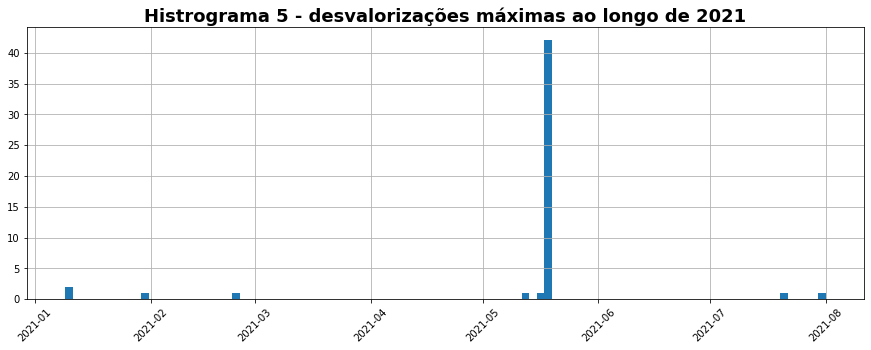

In [24]:
plt.title("Histrograma 5 - desvalorizações máximas ao longo de 2021", fontdict=plot_title_fontdict)
df.loc[grouped_change_2021.idxmin(), 'Date'].hist(xrot=45, bins=100, figsize=(15, 5))

A maior parte das máximas desvalorizações ocorreu no mês de maio

In [25]:
minimas_2021 = df.loc[grouped_change_2021.idxmin(), ['Date', 'Currency_Name', 'Change %']]
date_filter = ('2021-05' <= minimas_2021['Date']) & (minimas_2021['Date'] <= '2021-06')
minimas_2021 = minimas_2021[date_filter]

In [26]:
minimas_2021['Date'].unique()

array(['2021-05-19T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [27]:
date_filter = minimas_2021['Date'] == '2021-05-19'
minimas_2021[date_filter]['Currency_Name'].count()

42

In [28]:
minimas_2021.sort_values('Change %').rename(columns={'Date': 'Data', 'Currency_Name': 'Nome da criptomoeda', 'Change %': 'Variação %'})

,Data,Nome da criptomoeda,Variação %
30043,2021-05-19,Kusama,-42.81
37973,2021-05-19,PancakeSwap,-42.06
39236,2021-05-19,SHIBA_INU,-41.90
36367,2021-05-19,Monero,-41.46
29627,2021-05-19,IOTA,-40.47
14646,2021-05-19,Cosmos,-39.73
45514,2021-05-19,THETA,-39.69
10390,2021-05-19,Bitcoin_SV,-39.16
21986,2021-05-19,EOS,-39.15
27990,2021-05-19,GRT,-39.08


Considerando os dados, podemos concluir que:
 * as máximas desvalorizações ocorreram em conjunto, com a diferença entre a campeã em desvalorização e a décima colocada sendo de 3,73 % e a diferença entre duas posições subjacentes em torno de um por cento
 * a esmagadora maioria das máximas desvalorizações ocorreu no dia 19 de maio de 2021
 * considerando os últimos argumentos, podemos dizer que as desvalorizações do mês de maio de 2021 estão fortemente correlacionadas
 * em maio de 2021, Maker não figura entre as maiores máximas desvalorizações, com uma variação de -24,99 %; Bitcoin_Cash e Polygon tiveram uma máxima desvalorização de -35,99 % e -33,76 % respectivamente; EOS terminou entre as dez maiores desvalorizações com -39,15 %; Elrond teve uma máxima desvalorização de -33.24 %
 * Binance_USD teve a menor máxima desvalorização, -0,12 %
 * Bitcoin teve uma máxima desvalorização relativamente baixa, de -14,40 %

## Qual a volatilidade de cada moeda?

Nessa discussão, considera-se que a volatilidade é o desvio padrão da rentabilidade histórica.

Text(0.5, 1.0, 'Número de criptomoedas ao longo dos anos')

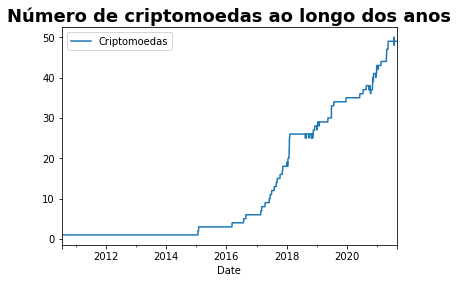

In [29]:
# df.loc[df['Date'] == '2021-08-24', ['Currency_Name', 'Price']]
df[['Currency_Name', 'Date']].rename(columns={'Currency_Name': 'Criptomoedas'}).groupby('Date').count().plot()
plt.title('Número de criptomoedas ao longo dos anos', fontdict=plot_title_fontdict)

Considerando que a maior parte das criptomoedas é bastante nova (menos de 10 anos) a medida e a comparação das volatilidades pode ficar comprometida.

In [30]:
df.rename(columns={'Currency_Name': 'Volatilidade (%)'}).groupby('Volatilidade (%)')['Change %'].std().sort_values(ascending=False).round(decimals=2)

Volatilidade (%)
Elrond              2159.23
Aave                 176.11
Dogecoin             158.09
Axie_Infinity         15.33
Monero                14.81
XPR                   10.66
ICP                   10.62
PancakeSwap           10.61
Avalanche             10.48
GRT                   10.03
SHIBA_INU              9.72
Solana                 9.54
Polygon                9.14
Stellar                8.92
Tron                   8.90
Bitcoin_SV             8.90
Kusama                 8.68
Uniswap                8.65
VeChain                8.65
EOS                    8.54
Maker                  8.30
Polkadot               8.12
THETA                  7.81
Bitcoin                7.74
BitTorrent             7.69
Bitcoin_Cash           7.67
Klaytn                 7.60
Crypto.com_Coin        7.58
Bitcoin_BEP2           7.51
Chainlink              7.45
IOTA                   7.28
Neo                    7.24
Dash                   7.22
Filecoin               7.20
Algorand               7.19
Eth

Como podemos perceber,
 * Elrond é a criptomoeda mais volátil, com 2159,23 %
 * Polygon fica na marca dos 9,14 %. EOS e Maker ocupam posições subjacentes, com 8,54 % e 8,30 % respectivamente. Bitcoin_Cash fica com 7,67 %
 * Binance_USD é a criptomoeda mais estável, com 0,03 %
 * Bitcoin tem 7,74 % de volatilidade

## Qual moeda rendeu mais?

In [31]:
def juros(serie):
    array = serie.to_list()
    r = 1 + array[0] / 100
    for i in range(1, len(array)):
        r = (1 + array[i] / 100) * r
    return r

df.rename(columns={'Currency_Name': 'Valorização (USD)'}).groupby('Valorização (USD)')['Change %'].aggregate(juros).sort_values(ascending=False).round(decimals=2)

Valorização (USD)
Bitcoin             152827.40
Elrond                7466.02
Aave                  3853.13
Monero                1027.55
Ethereum               297.24
Binance_Coin           248.71
Stellar                182.36
Solana                 132.99
Dogecoin               109.94
Polygon                 88.66
XPR                     82.05
Chainlink               57.53
THETA                   55.79
Litecoin                46.64
Tron                    42.08
Ethereum_Classic        41.84
FTX_Token               24.29
Avalanche               15.87
Uniswap                 12.96
Kusama                  10.57
Polkadot                 9.46
Crypto.com_Coin          9.03
Dash                     5.64
Cosmos                   5.26
Cardano                  4.91
EOS                      4.82
Waves                    4.81
PancakeSwap              3.73
BitTorrent               3.57
Axie_Infinity            3.38
Filecoin                 3.10
WBTC                     2.78
GRT                   

De acordo com os dados, se investíssemos um dólar em Bitcoin ou Elrond, teríamos o maior montante, de \\$ 152.827,40 e $ 7.466,02 respectivamente. Se o investimento fosse em Maker, perderíamos todo o capital. Com Binance_USD, estaríamos com o mesmo montante. 